# Data download and processing from Uniprot

Downloaded the data on 01 May 2024. 254,929 results filtering for "Catalytic activity" and Reviewed "Swiss-Prot".  

Selected download TSV and the columns, Seqeunce (under Sequences tab), EC number (under Function).

Unzipped the downloaded file.


In [1]:
import pandas as pd

df = pd.read_csv('data/uniprot/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv', sep='\t')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/uniprot/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv'

In [2]:
# Filter to only include sequneces < 512
df = df[df['Length'] < 512]
df

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
8,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108; 3.1.4.-,455
...,...,...,...,...,...
254921,P83855,ACLP_MOUSE,GVYMEIGRCRXEAXRRRKEAV,4.6.1.1,21
254922,P85957,PER_PSEMZ,AMAGTATVQGQGTR,1.11.1.7,14
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


# Explode out EC number so each EC has it's own row

In [3]:
# Drop rows that don't have an ec number
df = df[df['EC number'].notna()]
print(len(df))
# Now expand out the ones we have left
df['EC number'] = [ec.split(';') for ec in df['EC number']]
df = df.explode('EC number')
# Clean the EC numbers
df['EC number'] = [ec.replace(' ', '') for ec in df['EC number']]
df

199220


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_34484/1265130750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC number'] = [ec.split(';') for ec in df['EC number']]


,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
254921,P83855,ACLP_MOUSE,GVYMEIGRCRXEAXRRRKEAV,4.6.1.1,21
254922,P85957,PER_PSEMZ,AMAGTATVQGQGTR,1.11.1.7,14
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


In [4]:
df.to_csv('data/uniprot/processed.csv', index=False)

### Added a bit here to get rid of the short ones

In [5]:
df = pd.read_csv('data/uniprot/processed.csv')
df = df[df['Length'] >= 100 ]

In [7]:
df

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
1,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
4,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
213078,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
213079,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
213088,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
213089,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


### Perform clustering using mmseqs

In [9]:
#generate a fast file as input
with open('data/swissprot/swissprot.fasta', 'w') as f:
    for index, row in df.iterrows():
        f.write(f'>{row["Entry"]}\n{row["Sequence"]}\n')

# !mmseqs createdb examples/swissprot.fasta swissprot

In [12]:
!mmseqs easy-cluster data/swissprot/swissprot.fasta data/swissprot/clusterRes50 data/swissprot/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1

Create directory data/swissprot/mmseqs_tmp
easy-cluster data/swissprot/swissprot.fasta data/swissprot/clusterRes50 data/swissprot/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	

In [13]:
!mmseqs easy-cluster data/swissprot/swissprot.fasta data/swissprot/clusterRes30 data/swissprot/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1

easy-cluster data/swissprot/swissprot.fasta data/swissprot/clusterRes30 data/swissprot/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0

27415
8444


,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269,A0A009IHW8,A1AY86
1,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92
4,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721
...,...,...,...,...,...,...,...
208979,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352
208980,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8
208981,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115
208982,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8


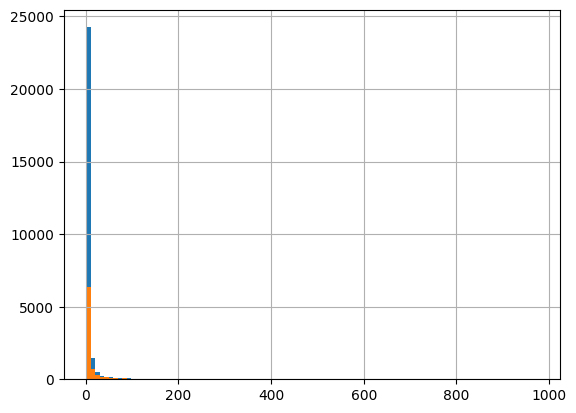

In [14]:
def process_clustering(name):
    clustering = pd.read_csv('data/swissprot/{}_cluster.tsv'.format(name), delimiter='\t', header=None)
    #rename heading as cluster reference and id
    clustering.columns = [name, 'Entry']
    clustering.drop_duplicates(subset='Entry', keep='first', inplace=True)
    print(clustering[name].nunique())
    clustering[name].value_counts().hist(bins=100)
    return clustering

cluster50 = process_clustering('clusterRes50')
cluster30 = process_clustering('clusterRes30')

df = pd.merge(df, cluster50, on='Entry', how='left')
df = pd.merge(df, cluster30, on='Entry', how='left')
df

In [15]:
df.to_csv('../processed_data/protein2EC.csv', index=False)